In [1]:
import numpy, scipy, matplotlib.pyplot as plt, librosa, sklearn
import urllib.request
import librosa.display
import os

[ 4.88201642e-15  3.45190736e-15  4.16773534e-15 -6.00068294e-17
  1.28115548e-15 -8.74280490e-17 -3.87369543e-17 -3.53982285e-15
  1.77364976e-15 -5.22207660e-16 -1.70055874e-15 -7.92141711e-17
  1.42862661e-16 -5.67712302e-16 -2.99389605e-16 -1.58508910e-16
  1.32298623e-15  4.17953045e-16 -1.87054049e-16  1.87142674e-16
  3.50147262e-16 -1.83201301e-15 -2.81020168e-17  6.40239353e-16
  1.39801088e-16  1.21560559e-16  3.51661935e-16  1.45086330e-16
  4.70644327e-16  1.91332194e-16 -4.52564933e-16  1.09427062e-16
 -2.25613754e-16  8.24288227e-17  6.19404544e-17  2.09830540e-16
 -2.36189273e-17  9.13315545e-17 -2.43008323e-16 -3.50066694e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


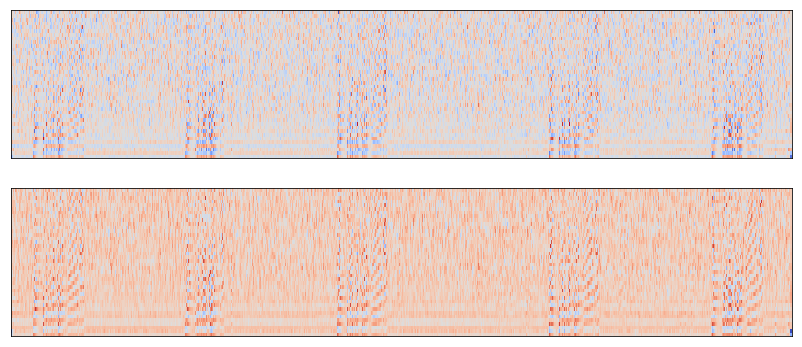

In [84]:
#def convert_to_image(birdSoundPath, birdName):
birdSoundPath = "Sombre Greenbul.mp3"
birdName = "Sombre Greenbul"
#plt.rcParams['figure.figsize'] = (14,6)


x, fs = librosa.load(birdSoundPath, sr=None, mono=True)
mfccs = librosa.feature.mfcc(x, sr=fs, n_fft=1024, hop_length=512, n_mfcc=40,fmin =0, fmax = 8000)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)  


print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))


plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
librosa.display.specshow(mfccs, sr=fs, cmap="coolwarm")
plt.subplot(2, 1, 2)
mfccs = librosa.feature.mfcc(x, sr=fs, n_fft=1024, hop_length=512, n_mfcc=40)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1) 
librosa.display.specshow(mfccs, sr=fs, cmap="coolwarm")

picName = birdName[:-4] + '5.png'
save_image(picName)

In [3]:
def save_image(picName):
    path = os.getcwd() + '/BirdMFCCS/TOP_10/ALL/'
    if not os.path.exists(path):
        os.makedirs(path)
    fileName = path + picName
    plt.savefig(fileName, bbox_inches='tight', pad_inches=0)

In [14]:
def main():
    plt.rcParams['figure.figsize'] = (5,5)

    totalFiles = 1
    count = 1

    path = os.getcwd()+ "/"
    print(path)
    fileNames = os.listdir(path)
    for fileName in fileNames:
        birdSound = path + fileName
        print(str(count) + '/' + str(totalFiles) + ' ' + fileName + 'conversion has started')
        convert_to_image(birdSound, fileName)
        print(str(count) + '/' + str(totalFiles) + ' ' + fileName + ' MFCC has been generated')
        count = count + 1

/home/iordan/Documents/Final/
1/1 Sombre Greenbul.mp3conversion has started
1/1 Sombre Greenbul.mp3 MFCC has been generated
2/1 BirdMFCCSconversion has started


IsADirectoryError: [Errno 21] Is a directory: '/home/iordan/Documents/Final/BirdMFCCS'

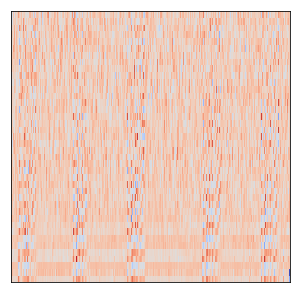

In [15]:
if __name__ == "__main__":
    main()